# 송인욱 - 로즈데이와 어버이날

In [190]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
import seaborn as sns

In [191]:
FONT_PATH = './Data_Inuk/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
rc('font', family=font_name)

## (1) 데이터 읽기

In [192]:
DIR = './Data_Inuk/'
ggJpRc = pd.read_csv(DIR+'google_japan_rc.csv', header=1)
ggUsaRc = pd.read_csv(DIR+'google_usa_rc.csv', header=1)
naKorRc = pd.read_excel(DIR+'naver_korea_rc.xlsx',header=6)
naKorPbr = pd.read_excel(DIR+'naver_korea_pbr.xlsx',header=6)
naShopFlower = pd.read_csv(DIR+'naver_shop_flower.csv', header=7)
naShopRc = pd.read_csv(DIR+'naver_shop_rc.csv', header=7)
naRoseYoung = pd.read_excel(DIR+'naver_rose_young.xlsx', header=6)
naRoseOld = pd.read_excel(DIR+'naver_rose_Old.xlsx', header=6)

dfList = [ggJpRc, ggUsaRc, naKorRc, naKorPbr, naShopFlower, naShopRc, naRoseYoung, naRoseOld]

c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [193]:
ggJpRc.head()

,주,カーネーション: (일본),バラ: (일본)
0,2021-07-11,4,38
1,2021-07-18,4,35
2,2021-07-25,4,33
3,2021-08-01,5,32
4,2021-08-08,5,34


In [194]:
ggUsaRc.head()

,주,rose day: (미국),carnation: (미국)
0,2021-07-11,22,62
1,2021-07-18,21,57
2,2021-07-25,20,61
3,2021-08-01,23,57
4,2021-08-08,26,70


In [195]:
naKorPbr.head()

,날짜,벚꽃,날짜.1,핑크뮬리,날짜.2,장미
0,2021-07-10,0.81980,2021-07-10,0.69495,2021-07-10,2.51507
1,2021-07-11,0.84989,2021-07-11,0.75362,2021-07-11,2.42332
2,2021-07-12,1.01836,2021-07-12,0.63929,2021-07-12,2.64143
3,2021-07-13,1.04845,2021-07-13,0.61673,2021-07-13,2.47296
4,2021-07-14,1.05145,2021-07-14,0.66336,2021-07-14,2.42933


In [196]:
naKorRc.head()

,날짜,장미,날짜.1,카네이션
0,2021-07-10,2.09376,2021-07-10,0.54848
1,2021-07-11,2.01738,2021-07-11,0.53220
2,2021-07-12,2.19895,2021-07-12,0.49714
3,2021-07-13,2.05870,2021-07-13,0.46959
4,2021-07-14,2.02239,2021-07-14,0.48462


In [197]:
naShopFlower.head()

,날짜,원예/식물
0,2021-07-10,38
1,2021-07-11,40
2,2021-07-12,38
3,2021-07-13,38
4,2021-07-14,36


In [198]:
naShopRc.head()

,날짜,장미,카네이션
0,2021-07-10,1,0
1,2021-07-11,1,0
2,2021-07-12,1,0
3,2021-07-13,0,0
4,2021-07-14,1,0


## (2) 데이터 전처리

### (2-1) 데이터 정제

#### (2-1-1) 결측치 확인

In [199]:
# 데이터프레임 리스트에서 결측치 확인해주는 함수
def missingVal(dflist):
    for i in dflist:
        print(f'{i.isnull().sum()}', '\n')

In [200]:
missingVal(dfList)

주                0
カーネーション: (일본)    0
バラ: (일본)         0
dtype: int64 

주                  0
rose day: (미국)     0
carnation: (미국)    0
dtype: int64 

날짜      0
장미      0
날짜.1    0
카네이션    0
dtype: int64 

날짜      0
벚꽃      0
날짜.1    0
핑크뮬리    0
날짜.2    0
장미      0
dtype: int64 

날짜       0
원예/식물    0
dtype: int64 

날짜      0
장미      0
카네이션    0
dtype: int64 

날짜    0
장미    0
dtype: int64 

날짜    0
장미    0
dtype: int64 



### (2-2) 데이터 표준화

In [201]:
# 해외 데이터 한국어로 정리
ggJpRc = ggJpRc.rename(columns={'주': '날짜', 'カーネーション: (일본)': '카네이션', 'バラ: (일본)': '장미'})
ggUsaRc = ggUsaRc.rename(columns={'주': '날짜', 'rose day: (미국)': '장미', 'carnation: (미국)': '카네이션'})

In [202]:
# 필요없는 중복컬럼 정리
naKorPbr = naKorPbr.drop(columns='날짜.1')
naKorPbr = naKorPbr.drop(columns='날짜.2')
naKorRc = naKorRc.drop(columns='날짜.1')

In [203]:
# 날짜 컬럼 datetime으로 바꿔주는 함수
def makeDatetime(*df:pd.DataFrame):
    for i in df:
        i['날짜'] = pd.to_datetime(i['날짜'])

In [204]:
# 함수실행
makeDatetime(ggJpRc, ggUsaRc, naKorRc, naKorPbr, naShopFlower, naShopRc, naRoseOld, naRoseYoung)

In [205]:
# df의 날짜컬럼 월단위로 나눈 리스트 만들어주는 함수
def makeDateList(df:pd.DataFrame):
    mr = pd.date_range(start=df['날짜'].min(), end=df['날짜'].max(), freq='MS')
    return list(mr.astype(str))

def makeDateList2(df:pd.DataFrame):
    mr = pd.date_range(start=df['날짜'].min(), end=df['날짜'].max(), freq='2MS')
    return list(mr.astype(str))

In [206]:
# 날짜별 데이터 월별 평균으로 그룹해서 집계해주는 함수
def nalToMonth(df:pd.DataFrame):
    df['날짜'] = df['날짜'].dt.to_period(freq='M')
    monGroup = df.groupby('날짜').mean().reset_index()
    monGroup['날짜'] = monGroup['날짜'].astype(str)
    return monGroup

### (2-3) 데이터 정규화

In [207]:
# 날짜를 제외한 컬럼 데이터를 정규화시킨 컬럼 추가한 df 반환
def makeNomal(df:pd.DataFrame):
    norDF = df.drop(columns='날짜')
    colList = list(norDF.columns)
    for i in colList:
        norDF[i + '_nor'] = norDF[i].apply(lambda x: (x - norDF[i].min()) / (norDF[i].max() - norDF[i].min()))
    result = pd.concat([df['날짜'], norDF], axis=1)
    return result

## (3) 데이터 추출 및 시각화

### (3-1) 각국에서의 장미, 카네이션 검색량 비교

#### (3-1-1) 한국
    - 카네이션과 비교했을때 장미의 검색량이 적음
    - 월별 변화를 보기 위해서 정규화시켜서 비교
    - 카네이션은 어버이날에 관심이 제일 높고 다른날에는 관심이 적음
    - 장미는 5월 14일에 관심이 제일 높고 천천히 줄어듬

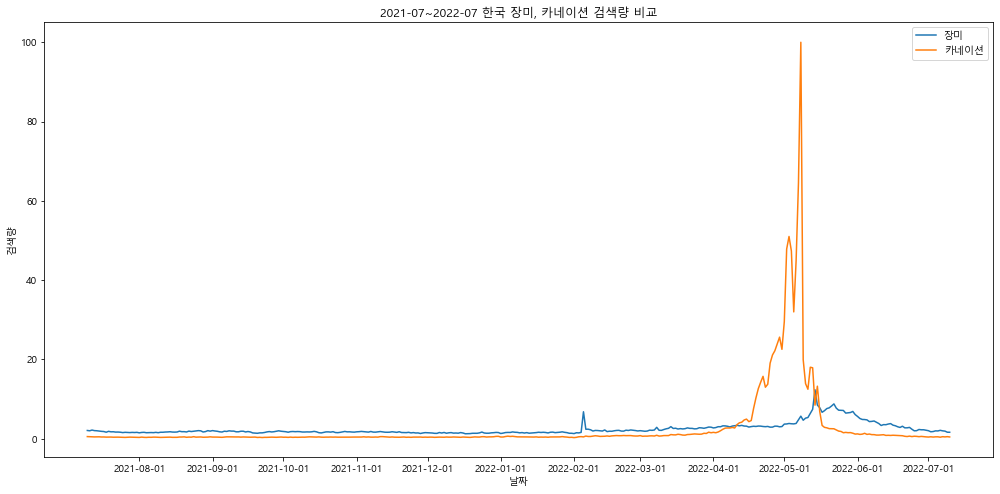

In [208]:
# 일반 비교
plt.figure(figsize=(17,8))
plt.plot(naKorRc['날짜'], naKorRc['장미'], label='장미')
plt.plot(naKorRc['날짜'], naKorRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 한국 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()
plt.xticks(makeDateList(naKorRc))
plt.show()

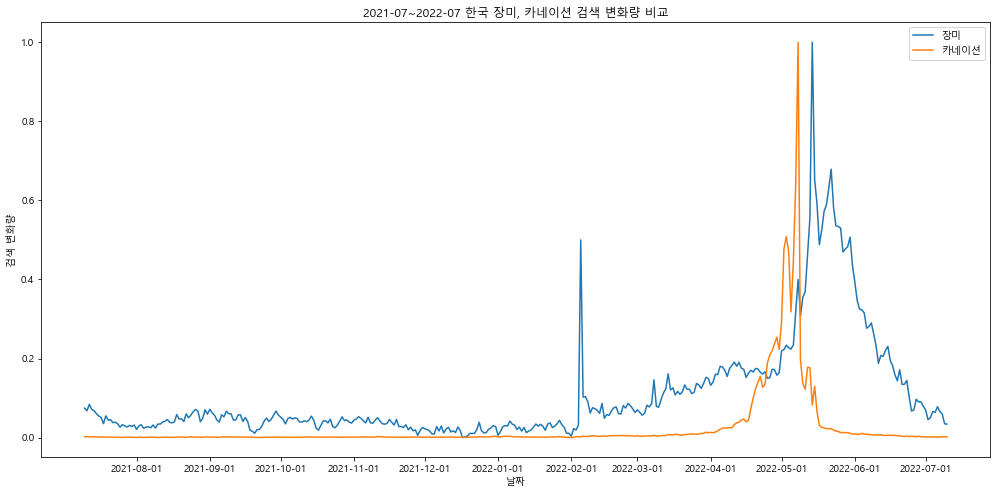

In [209]:
# 정규화시켜서 그래프
naKorRc_nor = makeNomal(naKorRc)
plt.figure(figsize=(17,8))
plt.plot(naKorRc_nor['날짜'], naKorRc_nor['장미_nor'], label='장미')
plt.plot(naKorRc_nor['날짜'], naKorRc_nor['카네이션_nor'], label='카네이션')
plt.title('2021-07~2022-07 한국 장미, 카네이션 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()
plt.xticks(makeDateList(naKorRc_nor))
plt.show()

#### (3-1-2) 미국, 일본
    - 미국, 일본 두나라 다 5월에 부모님께 카네이션을 주는 문화가 있음
    - 미국은 로즈데이가 발렌타인주에있고 일본은 로즈데이가 없음

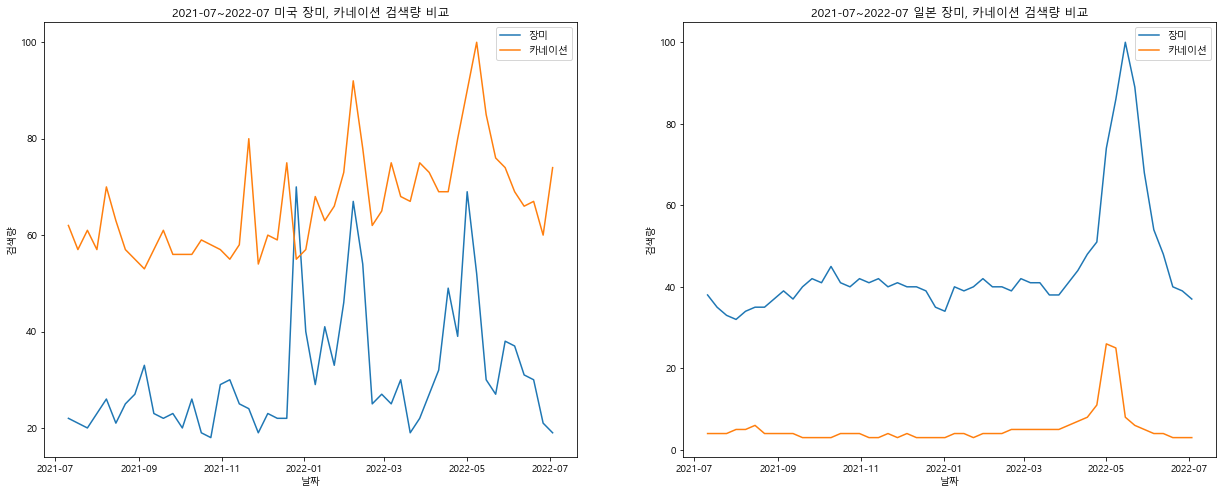

In [210]:
plt.figure(figsize=(21,8))

plt.subplot(122)
plt.plot(ggJpRc['날짜'], ggJpRc['장미'], label='장미')
plt.plot(ggJpRc['날짜'], ggJpRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 일본 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()

plt.subplot(121)
plt.plot(ggUsaRc['날짜'], ggUsaRc['장미'], label='장미')
plt.plot(ggUsaRc['날짜'], ggUsaRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 미국 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()

plt.show()

#### (3-1-3) 한, 미, 일
    = 정규화시킨 데이터를 비교했을때 어버이날에 카네이션을 선물하는 문화는 활성화되어있으나
    - 로즈데이가 2월인 미국, 로즈데이가 없는 일본도 5월에 관심 올라감
    - 한국의 로즈데이가 활성화되어있지 않은것 같음.


In [211]:
naKorRc_mon_nor = makeNomal(nalToMonth(naKorRc))
ggJpRc_mon_nor = makeNomal(nalToMonth(ggJpRc))
ggUsaRc_mon_nor = makeNomal(nalToMonth(ggUsaRc))

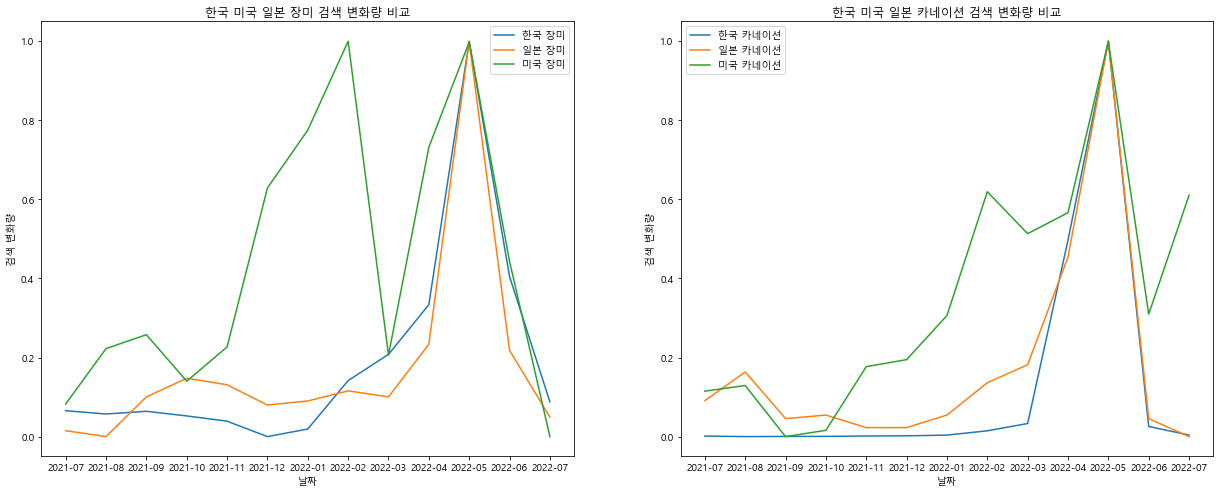

In [212]:
plt.figure(figsize=(21,8))

plt.subplot(121)
plt.plot(naKorRc_mon_nor['날짜'], naKorRc_mon_nor['장미_nor'], label='한국 장미')
plt.plot(ggJpRc_mon_nor['날짜'], ggJpRc_mon_nor['장미_nor'], label='일본 장미')
plt.plot(ggUsaRc_mon_nor['날짜'], ggUsaRc_mon_nor['장미_nor'], label='미국 장미')
plt.title('한국 미국 일본 장미 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()

plt.subplot(122)
plt.plot(naKorRc_mon_nor['날짜'], naKorRc_mon_nor['카네이션_nor'], label='한국 카네이션')
plt.plot(ggJpRc_mon_nor['날짜'], ggJpRc_mon_nor['카네이션_nor'], label='일본 카네이션')
plt.plot(ggUsaRc_mon_nor['날짜'], ggUsaRc_mon_nor['카네이션_nor'], label='미국 카네이션')
plt.title('한국 미국 일본 카네이션 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()

plt.show()

### (3-2) 벚꽃, 핑크뮬리와 비교
    - 벚꽃, 핑크뮬리같은 시즌제 꽃들과 장미의 관심도 비교
    - 꽃이 피는 계절의 순간적인 관심도는 적으나 지속적으로 검색 데이터가 있음
    - 급격히 내려가는 벚꽃, 핑크뮬리와는 다르게 완만하게 시즌에 걸쳐서 관심이 줄어드는 모습
    - 장미가 흔하기 때문에 로즈데이의 임팩트가 떨어지는것 같다.

In [213]:
naKorPbr_nor = makeNomal(naKorPbr)

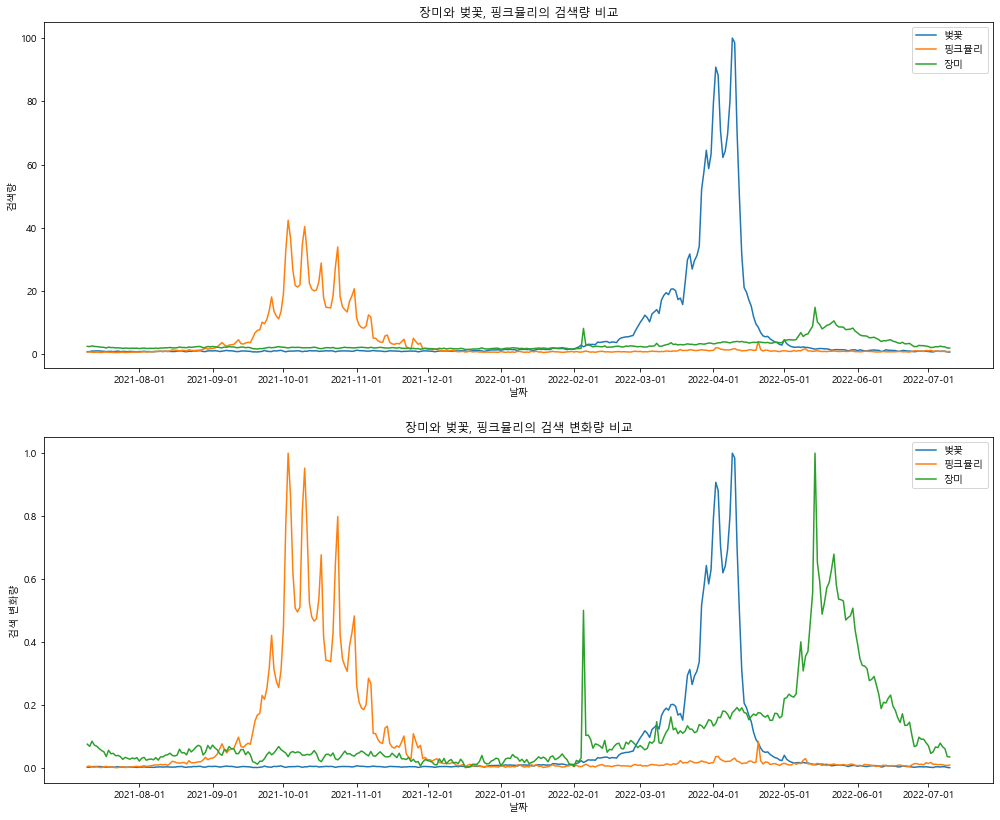

In [223]:
plt.figure(figsize=(17,14))

plt.subplot(211)
plt.plot(naKorPbr['날짜'], naKorPbr['벚꽃'], label='벚꽃')
plt.plot(naKorPbr['날짜'], naKorPbr['핑크뮬리'], label='핑크뮬리')
plt.plot(naKorPbr['날짜'], naKorPbr['장미'], label='장미')

plt.title('장미와 벚꽃, 핑크뮬리의 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.xticks(makeDateList(naKorPbr))
plt.legend()

plt.subplot(212)
plt.plot(naKorPbr_nor['날짜'], naKorPbr_nor['벚꽃_nor'], label='벚꽃')
plt.plot(naKorPbr_nor['날짜'], naKorPbr_nor['핑크뮬리_nor'], label='핑크뮬리')
plt.plot(naKorPbr_nor['날짜'], naKorPbr_nor['장미_nor'], label='장미')

plt.title('장미와 벚꽃, 핑크뮬리의 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.xticks(makeDateList(naKorPbr))
plt.legend()

plt.show()

### (3-3) 네이버 쇼핑 클릭량
    - 원예/식물 클릭량이 3 ~ 5월까지 제일 높음
    - 카네이션 클릭량은 어버이날 전후로 올라가지만 장미는 올라가지 않음
    - 로즈데이에 장미관련 상품이 부족해서 클릭량이 적은것 같다
    - 장미 관련 상품을 만들어서 팔 필요성이 있다

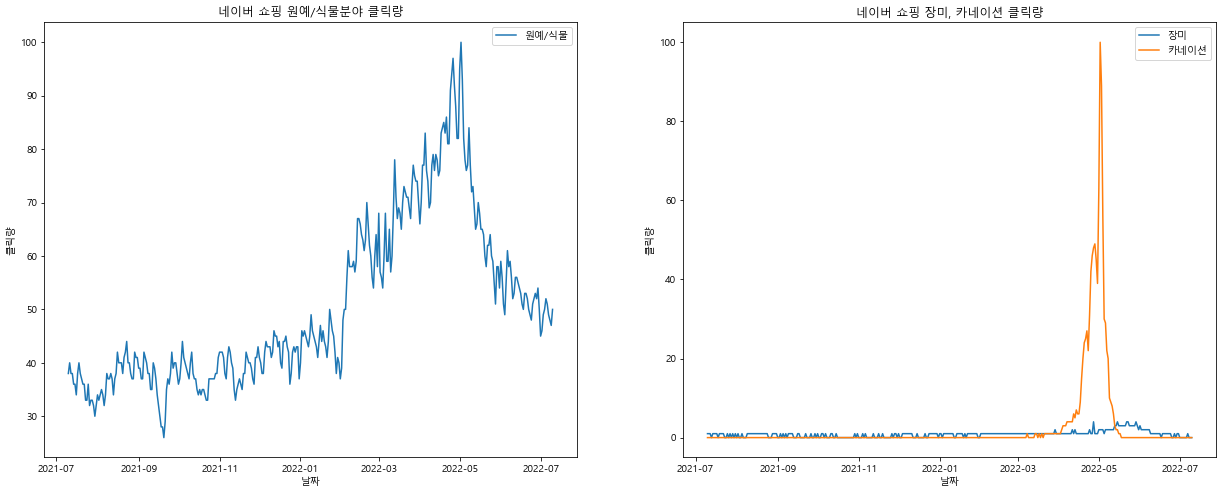

In [224]:
plt.figure(figsize=(21,8))

plt.subplot(121)
plt.plot(naShopFlower['날짜'], naShopFlower['원예/식물'], label='원예/식물')
plt.xlabel('날짜')
plt.ylabel('클릭량')
plt.title('네이버 쇼핑 원예/식물분야 클릭량')
plt.legend()

plt.subplot(122)
plt.plot(naShopRc['날짜'], naShopRc['장미'], label='장미')
plt.plot(naShopRc['날짜'], naShopRc['카네이션'], label='카네이션')
plt.xlabel('날짜')
plt.ylabel('클릭량')
plt.title('네이버 쇼핑 장미, 카네이션 클릭량')
plt.legend()

plt.show()

### (3-4) 장미 관심 연령별
    - 젊은층은 로즈데이에 장미에 대한 관심이 높다
    - 중장년층은 로즈데이뿐 아니라 5월 전체적으로 장미 관심이 높다
    - 따라서 젊은층한테는 로즈데이 자체를 홍보하고
    - 중장년층에게는 장미관련 상품을 홍보함으로써 로즈데이를 특별한날로 생각하게 한다

In [221]:
naRoseYoung_nor = makeNomal(naRoseYoung)
naRoseOld_nor = makeNomal(naRoseOld)

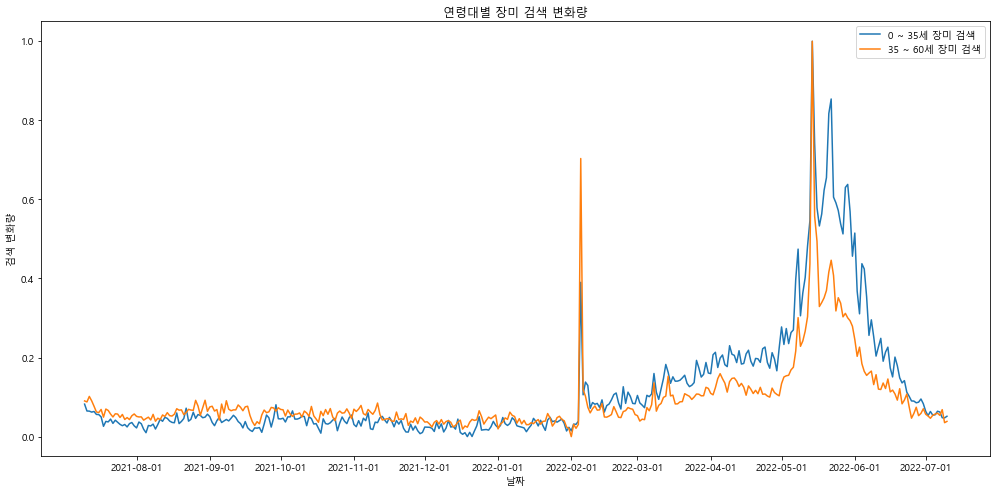

In [230]:
plt.figure(figsize=(17,8))

plt.plot(naRoseOld_nor['날짜'], naRoseOld_nor['장미_nor'], label='0 ~ 35세 장미 검색')
plt.plot(naRoseYoung_nor['날짜'], naRoseYoung_nor['장미_nor'], label='35 ~ 60세 장미 검색')

plt.title('연령대별 장미 검색 변화량')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.xticks(makeDateList(naRoseOld_nor))
plt.legend()

plt.show()